### Today:
* Generative models
* Naive Bayes

### Resources:
* Generative model: https://en.wikipedia.org/wiki/Generative_model
* Naive Bayes: http://cs229.stanford.edu/notes/cs229-notes2.pdf
* Naive Bayes: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

# Only take the first feature
X = iris.data[:, :1]
y = iris.target

print('IRIS DATASET')
print('Features', X[:3])
print('Class', y[:3])

# Separate training points by class (nb_classes * nb_samples * nb_features)
unique_y = np.unique(y)
print('Unique labels', unique_y)

points_by_class = np.array([[x for x, t in zip(X, y) if t == c] for c in unique_y])
print('Separeted', points_by_class.shape)

with tf.Session() as sess:
    
    # FIT
    
    # Estimate mean and variance for each class / feature 
    # Shape: number_of_classes * number_of_features
    mean, var = tf.nn.moments(tf.constant(points_by_class), axes=[1])
    
    print('Mean', mean.eval())
    print('Var', var.eval())
    
    # Create a 3x2 univariate normal distribution with the known mean and variance
    dist = tf.distributions.Normal(loc=mean, scale=tf.sqrt(var))
    
    # PREDICT
    
    nb_classes, nb_features = map(int, dist.scale.shape)
    
    print(nb_classes, nb_features)
    
    X = X[45:55]
    
    print(X.shape)
    print(tf.reshape(tf.tile(X, [1, nb_classes]), [-1, nb_classes, nb_features]).shape)
    
    # Conditional probabilities log P(x|c) with shape (nb_samples, nb_classes)
    cond_probs = tf.reduce_sum(
        dist.log_prob(tf.reshape(tf.tile(X, [1, nb_classes]), [-1, nb_classes, nb_features])),
        axis=2
    )
    
    # uniform priors
    priors = np.log(np.array([1. / nb_classes] * nb_classes))

    # posterior log probability, log P(c) + log P(x|c)
    joint_likelihood = tf.add(priors, cond_probs)

    # normalize to get (log)-probabilities
    norm_factor = tf.reduce_logsumexp(joint_likelihood, axis=1, keep_dims=True)
    
    log_prob = joint_likelihood - norm_factor
    
    # exp to get the actual probabilities
    Z = sess.run(tf.argmax(tf.exp(log_prob), axis=1))

    print(y[45:55])
    print(Z)

IRIS DATASET
Features [[5.1]
 [4.9]
 [4.7]]
Class [0 0 0]
Unique labels [0 1 2]
Separeted (3, 50, 1)
Mean [[5.006]
 [5.936]
 [6.588]]
Var [[0.121764]
 [0.261104]
 [0.396256]]
3 1
(10, 1)
(10, 3, 1)
[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 2 2 2 1 2]


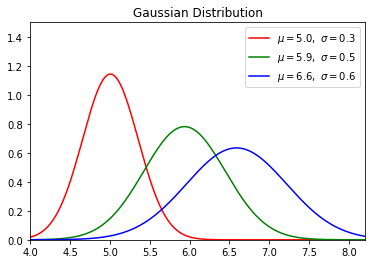

In [13]:
fig, ax = plt.subplots()

colors = ['r', 'g', 'b']

x = np.linspace(0, 10, 1000)

for i in range(len(mu)):
    
    # Create a normal distribution
    dist = norm(mu[i], sigma[i])
    
    # Plot
    plt.plot(x, dist.pdf(x), c=colors[i], label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu[i], sigma[i]))

plt.xlim(4.0, 8.2)
plt.ylim(0, 1.5)
plt.title('Gaussian Distribution')

plt.legend()
plt.show()